# ADA Project - Milestone 3

## *Historical and Sociocultural Analysis of the Impact of World Events on Film Genre Trends*

 *This project will explore historical trends in film genres, analyzing how societal and historical events—such as wars, economic shifts, and cultural influences—affect the popularity of genres. It will also examine the impact of culture and globalization on global film production. The goal is to understand how historical events and cultural dynamics shape film genre trends over time and understand how periods of conflict, economic upheaval, or stability shape audience preferences and genre popularity.*

# Exploratory Data Analaysis

Before beginning our study, to maximize our ability to manipulate the data, we must first analyze and explore our datasets, understand their key characteristics, and visualize their trends.
In this dataset overview, we shall inspect formats, assess distributions and identify data characteristics.
We must then proceed with data wrangling, transforming raw data into a structured and usable format for analysis.
This includes associating the correct names to our columns, removing outliers, nan and abherrent values and structuring our data so that it may be easier to work with. 

First and foremost, we must setup the environment with the installation of appropriate libraries. 

In [90]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns
from src.utils.appendix import *
from sklearn.preprocessing import MultiLabelBinarizer 
import geopandas as gpd
import plotly.graph_objects as go
from IPython.display import Image
%load_ext autoreload
%autoreload 2
from src.utils.data_cleaning import *
from src.utils.visualization import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1 - Data Collection

We begin with an initial overview of the raw imported data

In [91]:
raw_movies_data = pd.read_csv("data/MoviesDataset/movie.metadata.zip", header= None, delimiter='\t') # Columns are separated by tabs rather than commas

In [92]:
raw_movies_data.head(3)

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."


In [93]:
initial_length = len(raw_movies_data)
print("The initial dataframe has", initial_length, "lines", "and", len(raw_movies_data.columns), "columns.")

The initial dataframe has 81741 lines and 9 columns.


## 2 - Preliminary Data Cleaning 

Here are the different steps of our data cleaning: 
- name the columns for clarity
- remove the Freebase ID to keep only the name of the movies
- after quantification of NaN values, we saw that the columns 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Languages', 'Countries' and 'Genres' contain a number of missing values. Almost 90% of the movies are missing the information about the box office revenue, thus we cannot drop the rows with missing value in this column. However, movies with missing dates, countries and movie genre are unusable for our analysis and must therefore be removed from the dataset.
By doing so, we loose around 16,6% of the data, which is reasonable.
- For our analysis, we will only need the year of the movies, so we formatted the release dates.
- Finally, our analysis shows that 8 rows correspond to films released in 2014, 2 in 2015, and 2 in 2016. 
However, our dataset is based on a study conducted in 2013. 
Further investigation reveals that these dates are inconsistent with the actual release dates of the films. We therefore consider them as outliers and have decided to remove them.

In [94]:
clean_movies_data = preprocess_movies(raw_movies_data)
clean_movies_data = clean_movies_data.dropna(subset=["Year"])
clean_movies_data['Year'] = clean_movies_data['Year'].astype(int)
clean_movies_data.head()

,Movie name,Movie box office revenue,Movie runtime,Languages,Countries,Genres,Year
0,Ghosts of Mars,14010832.0,98.0,English,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001
1,Getting Away with Murder: The JonBenét Ramsey ...,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000
2,Brun bitter,NaN,83.0,Norwegian,Norway,"Crime Fiction, Drama",1988
3,White Of The Eye,NaN,110.0,English,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987
4,A Woman in Flames,NaN,106.0,German,Germany,Drama,1983


We also checked for duplicates in our dataset. 


In [95]:
# Check for completely identical rows (all columns match)
exact_duplicates = clean_movies_data[clean_movies_data.duplicated(keep=False)]
print(f"\nNumber of completely identical rows: {len(exact_duplicates)}")

#duplicates in the Movie name column
duplicates = clean_movies_data[clean_movies_data.duplicated(subset=['Movie name'], keep=False)]

#number of movie names that appear more than once
num_unique_duplicates = len(duplicates['Movie name'].unique())
print(f"\nNumber of unique movies that are duplicated: {num_unique_duplicates}")

print("\nExample of duplicated movies:")
duplicates[['Movie name', 'Year', 'Genres']].sort_values('Movie name')



Number of completely identical rows: 0

Number of unique movies that are duplicated: 3541

Example of duplicated movies:


,Movie name,Year,Genres
18992,100 Days,2001,Drama
77290,100 Days,1991,"Horror, Suspense, World cinema"
27259,12,2007,"Crime Fiction, Thriller, World cinema, Drama, ..."
17891,12,2003,"Comedy film, Musical, Indie"
21385,12 Angry Men,1997,Drama
...,...,...,...
14882,Zero Focus,2009,Japanese Movies
57860,Zero Focus,1961,"Thriller, Mystery, Japanese Movies, World cine..."
79,Zindagi,1976,Bollywood
40871,Zindagi,1964,"Family Film, Drama, Musical"


We can see that there are no completely identical rows in our dataset. While 3,542 movie names appear at least twice, these appear to be legitimate remakes of films rather than duplicate entries - they have different release years, and their genres are generally similar which is expected for remakes. Since these represent distinct movies rather than data errors, we will keep all entries in the dataset.


In [96]:
removed_lines = initial_length - len(clean_movies_data)
removed_percentage = (removed_lines / initial_length) * 100
print("After the preprocessing steps, the dataframe has", len(clean_movies_data), "rows.")
print("A total of " f"{removed_lines} rows were removed during the cleaning process, which corresponds to {removed_percentage:.1f}% of the initial dataset.")

After the preprocessing steps, the dataframe has 68131 rows.
A total of 13610 rows were removed during the cleaning process, which corresponds to 16.7% of the initial dataset.


### Save the dataset

The dataset has been cleaned and reformatted for easier analysis, and we’ve saved the updated version in a compressed format.

In [97]:
processed_data_path = 'data/Preprocessed_data/preprocessed_movie_metadata.csv'
clean_movies_data.to_csv(processed_data_path, encoding='utf-8', errors='ignore', index=False)
preprocessed_movies = clean_movies_data.copy()

After handling the missing values and formatting the data, we are left with 68131 movies in our data set from the initial 81741. We removed 16.7% of the rows. There are still missing values in 3 columns (Movie box office revenue, Movie runtime, and Movie release date) but since these variables are not central to our analysis of genre trends and historical events, we can proceed with our study using the complete data from the columns of interest.
We still retain a good amount of information to work with, all while ensuring that our analysis will stay pertinent.

## 3 - Univariate Analysis

Now that we've looked at missing values, it is time to assess one by one the different variables from our data independently to understand its characteristics, look for outliers and trends in their distribution. 

### Movie Runtime

In [98]:
preprocessed_movies['Movie runtime'].describe()

count    5.572300e+04
mean     1.135852e+02
std      4.572194e+03
min      0.000000e+00
25%      8.200000e+01
50%      9.300000e+01
75%      1.070000e+02
max      1.079281e+06
Name: Movie runtime, dtype: float64

From the graphical (boxplot below) and non-graphical (statistical) description of this variable, we are able to identify the presence of outliers. The maximum value (1 million minutes) is clearly aberrant. The other outliers can be defined using a certain threshold range.

Let's investigate these outliers!

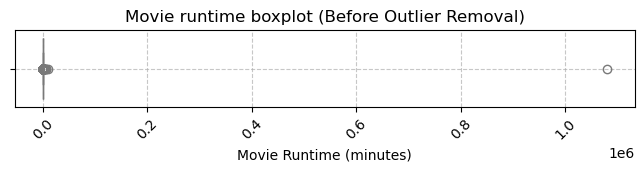

There are 3737 outliers among the 55723 runtime values which corresponds to 6.71% of the values.


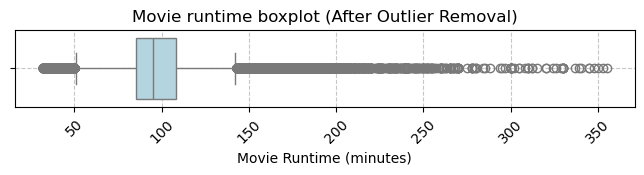

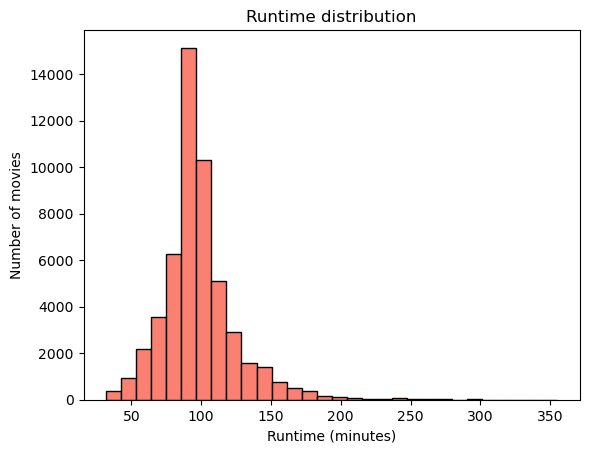

count    51986.000000
mean        98.596123
std         26.921654
min         32.000000
25%         85.000000
50%         95.000000
75%        108.000000
max        355.000000
Name: Movie runtime, dtype: float64

In [99]:
runtime_data = preprocessed_movies['Movie runtime'].dropna()

#Boxplot before outlier removal
plot_boxplot(runtime_data, 'Movie runtime boxplot (Before Outlier Removal)', 'Movie Runtime (minutes)', figsize=(8, 1), color='lightblue', orient='h')

#Identification and removing of outliers 
low_factor=2
up_factor = 10 #We choose a large factor because the distribution is right-skewed and we want to make sure that we do not exclude values that are not outliers.
lower_bound, upper_bound=outliers_bounds(runtime_data, low_factor, up_factor)
outliers = runtime_data[(runtime_data < lower_bound) | (runtime_data > upper_bound)]
print(f"There are {len(outliers)} outliers among the {len(runtime_data)} runtime values which corresponds to {len(outliers)/len(runtime_data)*100:.2f}% of the values.")

no_outlier_data=preprocessed_movies.copy()
no_outlier_data = no_outlier_data[(no_outlier_data['Movie runtime'] >= lower_bound) & (no_outlier_data['Movie runtime'] <= upper_bound)]

#Boxplot after outlier removal
plot_boxplot(no_outlier_data['Movie runtime'], 'Movie runtime boxplot (After Outlier Removal)', 'Movie Runtime (minutes)', figsize=(8, 1), color='lightblue', orient='h')

#Runtime distribution
plt.figure()
plt.hist(no_outlier_data['Movie runtime'], bins=30,  color='salmon',edgecolor='black')
plt.title('Runtime distribution')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of movies')
plt.show()

no_outlier_data['Movie runtime'].describe()

After outlier removal, the distribution of movie runtime seems almost to follow a negative binomial distribution.
For now, we choose not to remove the runtime outliers from our dataset since the runtime variable is not currently central to our analysis. Additionally, they represent more than 6% of our data, which is a non-negligible portion that we don't want to discard if it is not necessary.

### Movie Box Office Revenue

In [100]:
preprocessed_movies['Movie box office revenue'].describe()

count    8.225000e+03
mean     4.865907e+07
std      1.129534e+08
min      1.000000e+04
25%      2.153070e+06
50%      1.098933e+07
75%      4.162405e+07
max      2.782275e+09
Name: Movie box office revenue, dtype: float64

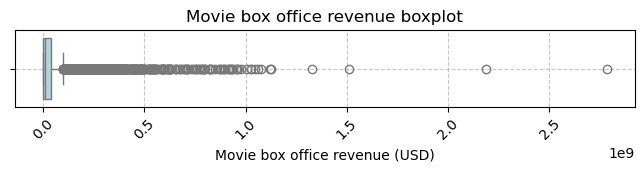

In [101]:
plot_boxplot(preprocessed_movies['Movie box office revenue'], 'Movie box office revenue boxplot', 'Movie box office revenue (USD)', figsize=(8, 1), color='lightblue', orient='h')

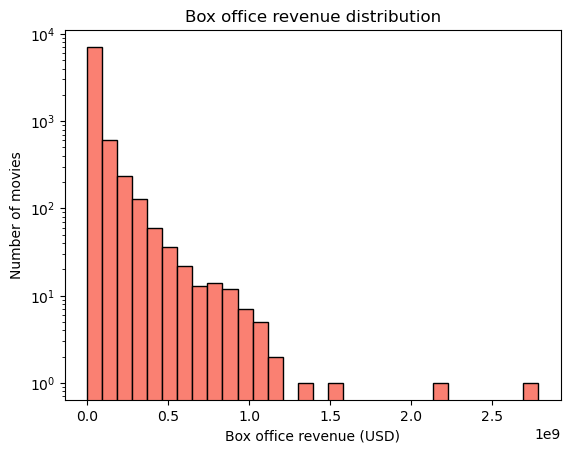

In [102]:
#Box office revenue distribution
plt.figure()
plt.hist(preprocessed_movies['Movie box office revenue'], bins=30, color='salmon', edgecolor='black')
plt.yscale('log')
plt.title('Box office revenue distribution')
plt.xlabel('Box office revenue (USD)')
plt.ylabel('Number of movies')
plt.show()

In [103]:
preprocessed_movies.sort_values(by='Movie box office revenue', ascending=False).head()

,Movie name,Movie box office revenue,Movie runtime,Languages,Countries,Genres,Year
23702,Avatar,2.782275e+09,178.0,"English , Spanish","United States of America, United Kingdom","Thriller, Science Fiction, Adventure, Computer...",2009
22256,Titanic,2.185372e+09,194.0,"Italian , English , French , Swedish , Russian...",United States of America,"Tragedy, Costume drama, Historical fiction, Ac...",1997
28192,The Avengers,1.511758e+09,137.0,"Russian , English",United States of America,"Science Fiction, Action",2012
30278,Harry Potter and the Deathly Hallows – Part 2,1.328111e+09,130.0,English,"United States of America, United Kingdom","Drama, Mystery, Fantasy, Adventure",2011
18645,Transformers: Dark of the Moon,1.123747e+09,157.0,English,United States of America,"Alien Film, Science Fiction, Action, Adventure",2011


From the distribution and boxplot, we can identify two very high values around 2.5 billions USD, but these are not outliers as they correspond to the actual box office revenues of Avatar and Titanic. There do not seem to be any significant outliers in this variable, which is reassuring because we are already quite limited in terms of the number of instances due to the high number of missing values in this category.


Once more, the distribution is resemblant to a negative binomial one, but mostly most values remain around e+07, with very few great box office hits above 0.5e+09. We must however note that from the initial analysis and cleaning, a lot of values were missing. This could explain the greatly unbalanced distribution described in the histogram and must be considered as a influential factor as we continue this study.

### Movie Release Year

Movie release years is one of the most important numerical value of our analysis. We must therefore carefully study its distribution and trends.

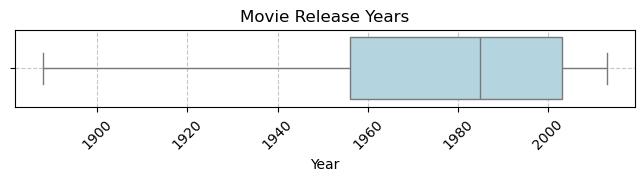

In [104]:
plot_boxplot(preprocessed_movies['Year'], 'Movie Release Years', 'Year', figsize=(8, 1), color='lightblue', orient='h')


It is important to note for our future analysis that the number of movies produced each year is not uniform. This variability should be taken into account when comparing film counts over time. In some cases, using proportions instead of absolute numbers might provide more meaningful insights.

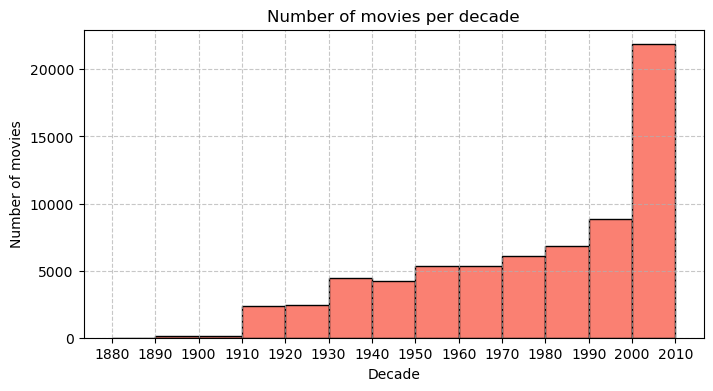

In [105]:
#Compute decade to which each movie corresponds
decades=(preprocessed_movies['Year'] // 10) * 10

plt.figure(figsize=(8, 4))
decades.hist(bins=range(decades.min(), decades.max() + 10, 10), color='salmon', edgecolor='black')
plt.xlabel("Decade")
plt.ylabel("Number of movies")
plt.xticks(range(decades.min(), decades.max() + 10, 10))
plt.title("Number of movies per decade")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Languages 

In [106]:
#Number of languages in the dataset
languages = preprocessed_movies['Languages'].str.split(', ').explode().unique()
print(f"There are {len(languages)} languages in the dataset")

There are 213 languages in the dataset


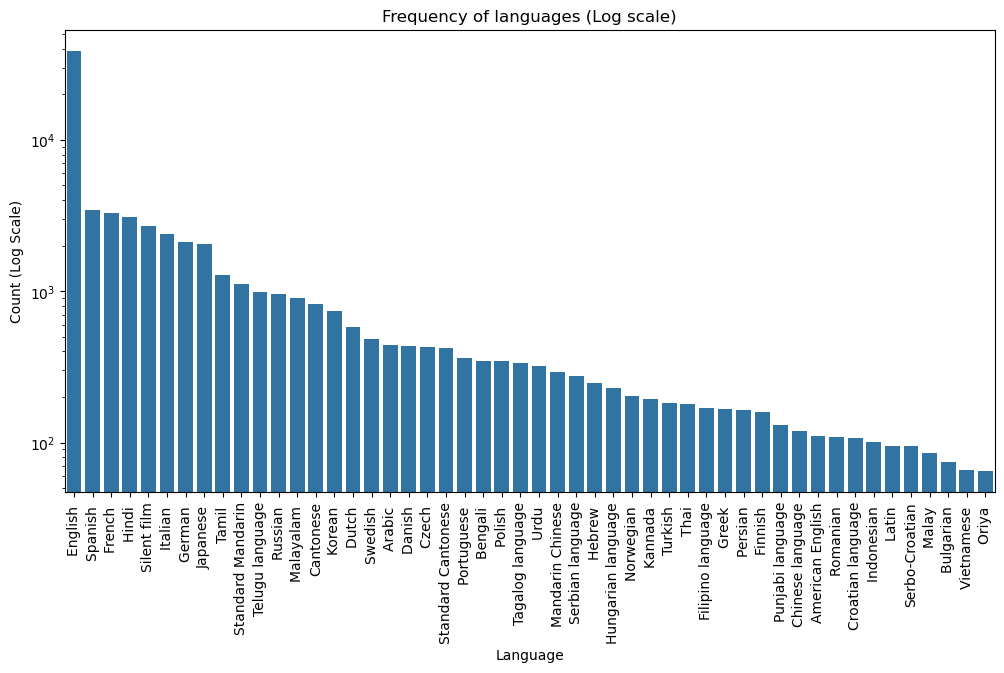

The number of movies in English is 38846 which corresponds to 57.02% of the total number of movies.


In [107]:
top_n = 50

language_counts = preprocessed_movies['Languages'].str.split(', ').explode().value_counts()
top_languages = language_counts.head(top_n)
top_languages_df = top_languages.reset_index()
top_languages_df.columns = ['Language', 'Count']


plt.figure(figsize=(12, 6))
sns.barplot(x='Language', y='Count', data=top_languages_df)
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Frequency of languages (Log scale)')
plt.ylabel('Count (Log Scale)')
plt.show()

# show the percentage of english language movies compared to the total number of movies
english_movies = preprocessed_movies['Languages'].str.contains('English').sum()
print(f"The number of movies in English is {english_movies} which corresponds to {english_movies/len(preprocessed_movies)*100:.2f}% of the total number of movies.")

### Countries

In [108]:
#Number of countries in the dataset
countries = preprocessed_movies['Countries'].str.split(', ').explode().unique()

print(f"There are {len(countries)} countries in the dataset")

There are 146 countries in the dataset


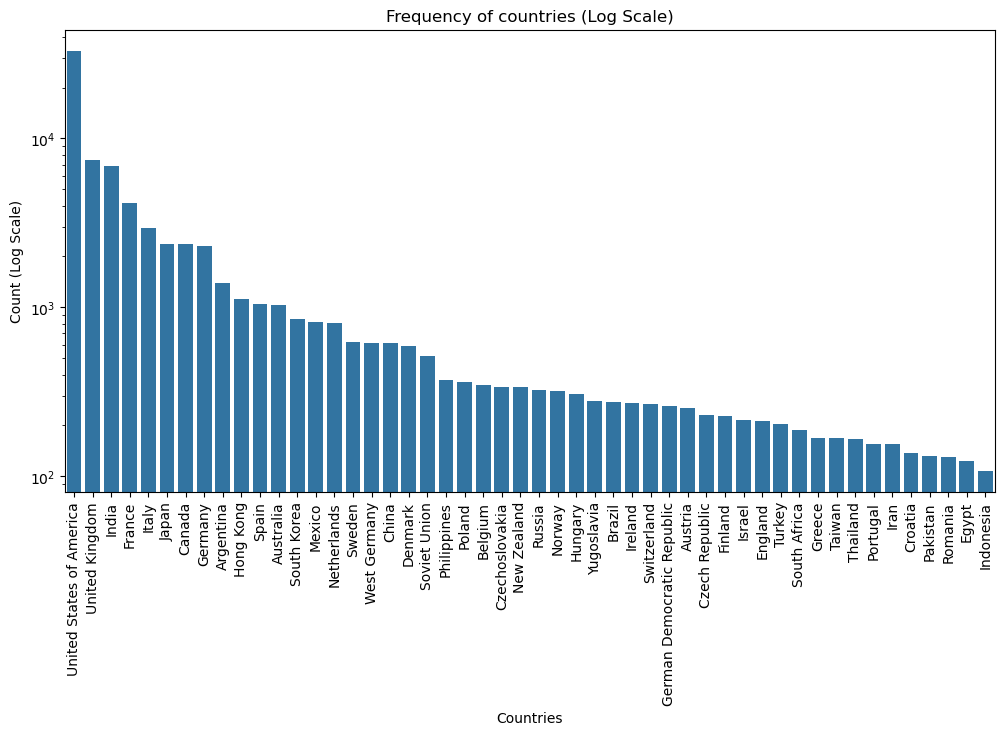

The number of American movies is 33104 which corresponds to 48.59% of the total number of movies.


In [109]:
top_n = 50

countries_counts = preprocessed_movies['Countries'].str.split(', ').explode().value_counts()
top_countries = countries_counts.head(top_n)
top_countries_df = top_countries.reset_index()
top_countries_df.columns = ['Countries', 'Count']

#Using a logarithmic scale
plt.figure(figsize=(12, 6))
sns.barplot(x='Countries', y='Count', data=top_countries_df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Frequency of countries (Log Scale)')
plt.ylabel('Count (Log Scale)')
plt.show()

# show the percentage of english language movies compared to the total number of movies
american_movies = preprocessed_movies['Countries'].str.contains('United States of America').sum()
print(f"The number of American movies is {american_movies} which corresponds to {american_movies/len(preprocessed_movies)*100:.2f}% of the total number of movies.")

Half of the movies of the dataset are American. We see that they largely dominate the movie industry. This can be explained mainly because of Hollywood's early establishment, access to large budgets, and the widespread use of English and american pop culture that make these movies more accessible and appealing. 

This suggests that we have sufficient data for an in-depth study of globalization and the influence of the United States on the global film industry.

### Movie Genres

In this section, we will examine how movies are classified into genres. Carefully analyzing, selecting and refining these genre classifications is essential for obtaining meaningful insights. 
We will discuss our approach to selecting and adjusting genres for our following study. 

In [110]:
#Number of genres in the dataset but we can see that there are a lot of categories that could be combined
genres = preprocessed_movies['Genres'].str.split(', ').explode().unique()

print(f"There are {len(genres)} genres in the dataset")

There are 362 genres in the dataset


Movies are classified into various genres that capture themes, styles, or settings. However, not all these aspects are relevant to our analysis, so we need to select genres that allow us to group films meaningfully.

Let's begin by  focusing on the number of movies in each genre category.

#### ➔ Number of Movies per Genre


In [111]:
genres_counts = preprocessed_movies['Genres'].str.split(', ').explode().value_counts()
genres_counts

Genres
Drama              30518
Comedy             15418
Romance Film        9351
Black-and-white     8761
Thriller            8107
                   ...  
C-Movie                1
Comdedy                1
War effort             1
Breakdance             1
Homoeroticism          1
Name: count, Length: 362, dtype: int64

A lot of genres might not be meaningful because they contain few movies. In particular, 86 genres are assigned to 10 movies or less.

In order to keep only relevant genres, we can define an arbitrary threshold for the number of movies assigned to each genre.

In [112]:
threshold = 50
relevant_genres = genres_counts[genres_counts > threshold]
print(f"Number of genres assigned to more than {threshold} movies: {len(relevant_genres)}.")

Number of genres assigned to more than 50 movies: 196.


Now, we will examine the distribution of the most popular genres.

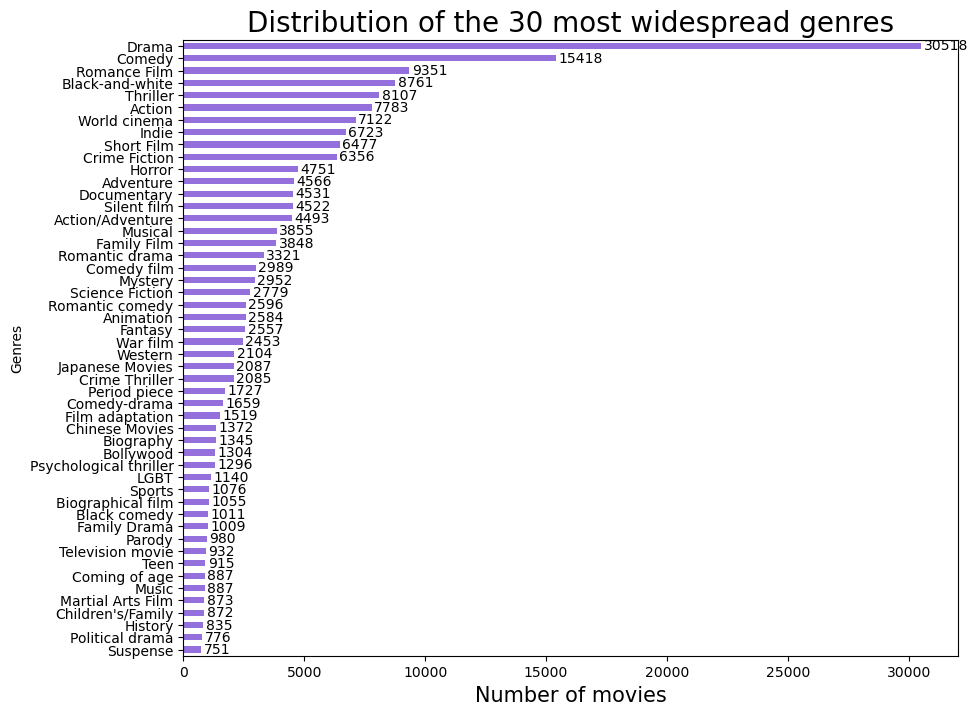

In [113]:
#30 most widespread genres
top_30_genres = relevant_genres.head(50)

plt.figure(figsize=(10, 8))
top_30_genres.plot(kind='barh', color='#9370DB')
plt.xlabel('Number of movies', fontsize=15)
plt.title('Distribution of the 30 most widespread genres', fontsize=20)
plt.gca().invert_yaxis() 

for index, value in enumerate(top_30_genres):
    plt.text(value + 100, index, str(value), va='center')
plt.show()

We observe that the 4th genre is "Black and White" and the 9th is "Short Film"—both of which are not relevant to our analysis. We can manually remove these and other unhelpful categories to focus on more meaningful genre information.

In [114]:
#Remove all the genre that give information about the technical aspect of the movie rather than the content
technical_information = ['Silent film','Short Film','Musical', 'Film adaptation',"Black-and-white", "Music", "Teen", "Stop Motion"]

preprocessed_movies['Genres'] = preprocessed_movies['Genres'].apply(lambda x: filter_genres(x, unwanted_genres=technical_information))

#### ➔ Balancing Genre Reduction with Dataset Coverage

Even if we want to choose a reduced set of genres, we still want to retain a significant portion of the dataset.
We will try to identify the minimum number of genres needed to cover the majority of movies in our dataset.
Specifically, we want to analyze how many movies fall into groups defined by an increasing number of genres and determine how many genres are required to capture, for example, 90% of all films.

In [115]:
genre_movies = preprocessed_movies['Genres'].str.split(', ').explode()
genre_counts = genre_movies.value_counts().reset_index()
genre_counts.columns = ['Genres', 'Count']
genre_counts.head(10)

,Genres,Count
0,Drama,30518
1,Comedy,15418
2,Romance Film,9351
3,Thriller,8107
4,Action,7783
5,World cinema,7122
6,Indie,6723
7,Crime Fiction,6356
8,Horror,4751
9,Adventure,4566


In [116]:
genre_counts_top_100 = genre_counts.iloc[:100]
genre_counts_top_30 = genre_counts.iloc[:30]
genre_counts_top_10 = genre_counts.iloc[:10]
genre_counts_top_3 = genre_counts.iloc[:3]

In [117]:
#define a list of genre counts for each top N genres
genre_counts_list = [genre_counts_top_100, genre_counts_top_30, genre_counts_top_10, genre_counts_top_3]
top_n_values = [100, 30, 10, 3]

coverages = {}
for top_n, genre_counts in zip(top_n_values, genre_counts_list):
    _, coverage = most_common_genres(preprocessed_movies, genre_counts, top_n)
    coverages[top_n] = coverage

for top_n, coverage in coverages.items():
    print(f"Number of films covered by the {top_n} major genres: {coverage:.2f}%")

print("-"*32)
print(f"60% of the movies are classified into the 3 major genres that are \n" , genre_counts_top_3['Genres'].values,  f"\n\nUp to 92% of the film are classified into the 30 major genres that are: \n", genre_counts_top_10['Genres'].values)
print("-"*32)

Number of films covered by the 100 major genres: 95.93%
Number of films covered by the 30 major genres: 94.42%
Number of films covered by the 10 major genres: 81.09%
Number of films covered by the 3 major genres: 63.41%
--------------------------------
60% of the movies are classified into the 3 major genres that are 
 ['Drama' 'Comedy' 'Romance Film'] 

Up to 92% of the film are classified into the 30 major genres that are: 
 ['Drama' 'Comedy' 'Romance Film' 'Thriller' 'Action' 'World cinema'
 'Indie' 'Crime Fiction' 'Horror' 'Adventure']
--------------------------------


Thus by a few genre we can cover a large part of the movies, but the remaining 8% of movies that are not covered by these major genres exhibit high variance, as they require many different genres to be classified

#### ➔ Correlation Between Genres

Based on the genre names alone, we can anticipate that certain genres might be correlated, appearing together frequently in movies. To explore these relationships, we’ll create a heatmap to visualize genre associations and identify any genres that are commonly paired in films.

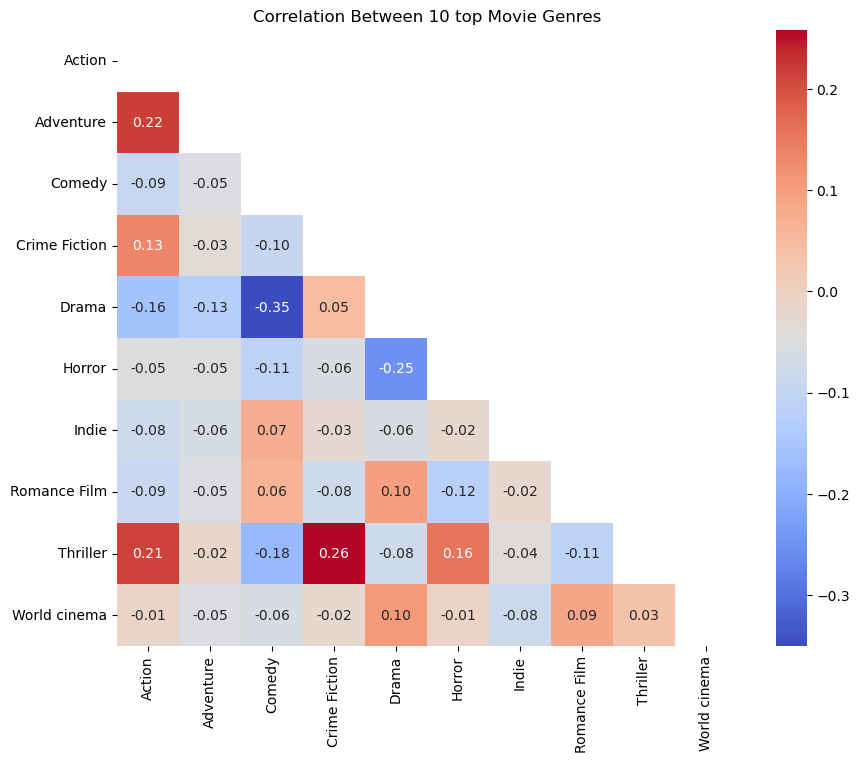

In [118]:
most_10commongenres,coverage10 = most_common_genres(preprocessed_movies, genre_counts_top_10, 10)
most_10commongenres = most_10commongenres.dropna(subset=['Genres'])

#Tranform the multi label genre of each movie into a binary matrix where each column represent a genre and each row a movie. If the movie is classified into the genre the value is 1 otherwise it is 0
mlb = MultiLabelBinarizer()

genre_binary_matrix = pd.DataFrame(mlb.fit_transform(most_10commongenres['Genres'].str.split(', ')), columns=mlb.classes_, index=most_10commongenres.index)
genre_correlation = genre_binary_matrix.corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(genre_correlation, dtype=bool))
sns.heatmap(genre_correlation, mask=mask, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Between 10 top Movie Genres')
plt.show()

This heatmap illustrates how frequently two genres are used together to describe the same movie.

For example, the combination of "Crime Fiction" and "Thriller" shows a moderate positive correlation (0.26), suggesting that these genres often co-occur, meaning that movies labeled as "Crime Fiction" frequently include elements of "Thriller" as well. However, this co-occurrence is only moderately consistent across the dataset.

On the other hand, "Drama" and "Documentary" have a strong negative correlation (-0.28), indicating that these genres are rarely used together. This suggests that movies classified as "Drama" are typically not labeled as "Documentary" and vice versa.

Let's try this heat map for the top 30 genres now.

Index(['Action', 'Action/Adventure', 'Adventure', 'Animation', 'Biography',
       'Bollywood', 'Chinese Movies', 'Comedy', 'Comedy film', 'Comedy-drama',
       'Crime Fiction', 'Crime Thriller', 'Documentary', 'Drama',
       'Family Film', 'Fantasy', 'Horror', 'Indie', 'Japanese Movies',
       'Mystery', 'Period piece', 'Romance Film', 'Romantic comedy',
       'Romantic drama', 'Science Fiction', 'Thriller', 'War film', 'Western',
       'World cinema'],
      dtype='object')


Text(0.5, 1.0, 'Correlation Between 30 top Movie Genres')

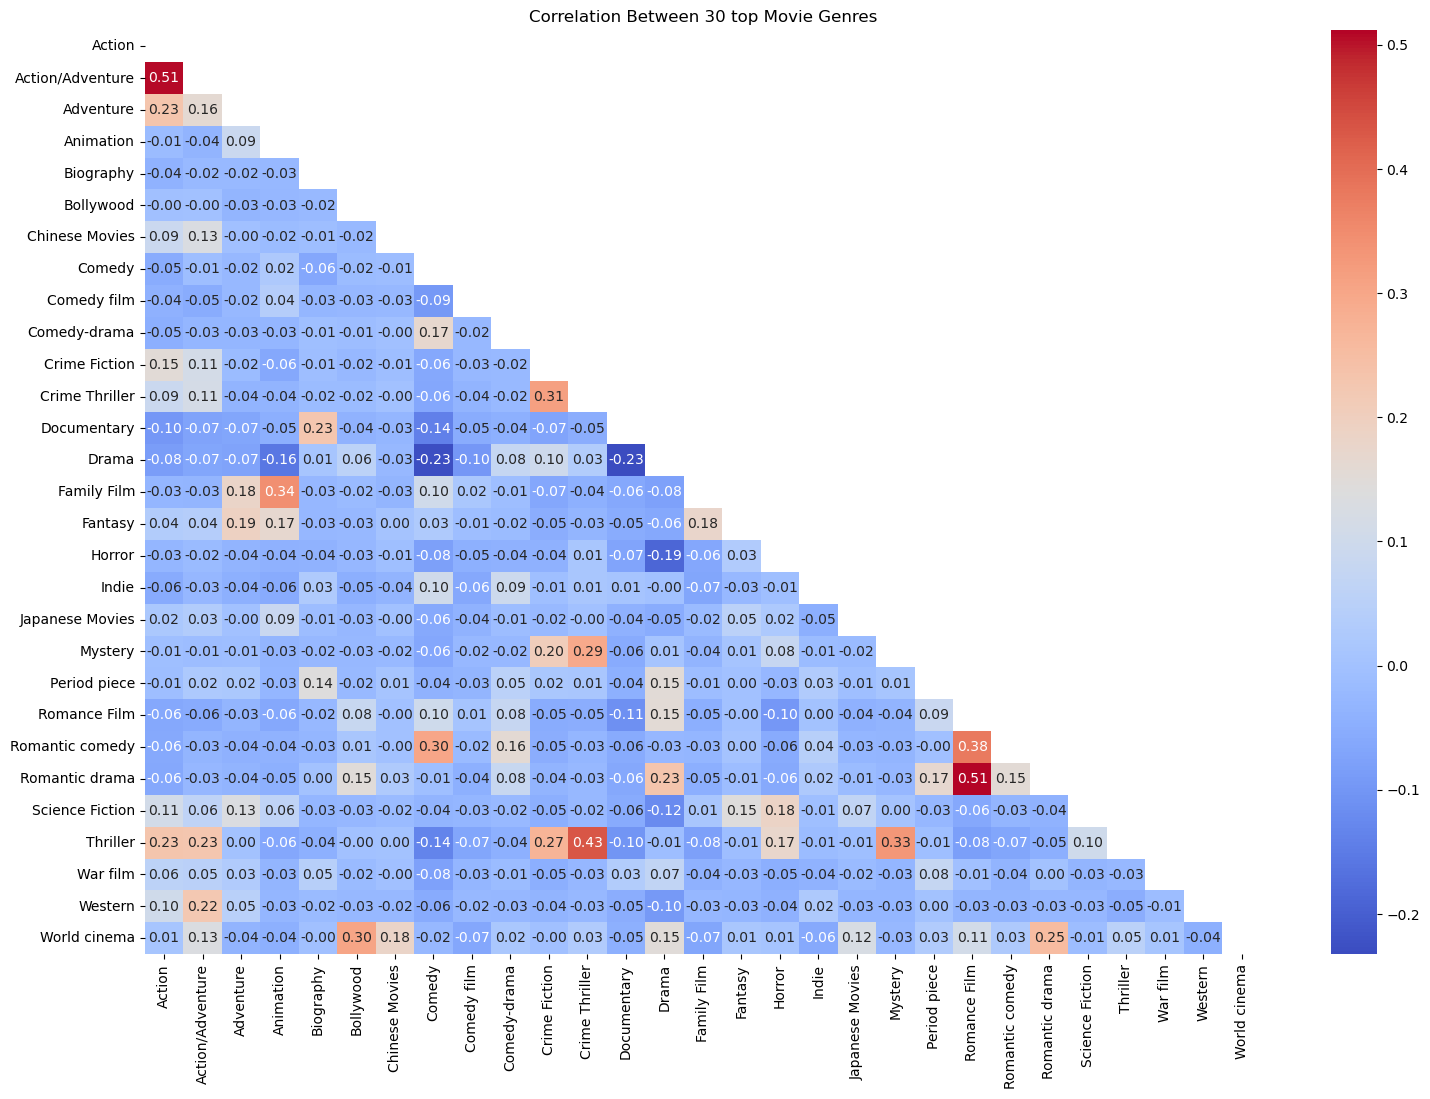

In [119]:
most_30commongenres,coverage30 = most_common_genres(preprocessed_movies, genre_counts_top_30, 30)
most_30commongenres = most_30commongenres.dropna(subset=['Genres'])

genre_binary_matrix = pd.DataFrame(mlb.fit_transform(most_30commongenres['Genres'].str.split(', ')), columns=mlb.classes_, index=most_30commongenres.index)
genre_correlation = genre_binary_matrix.corr()

print(genre_correlation.index)

plt.figure(figsize=(18, 12))
mask = np.triu(np.ones_like(genre_correlation, dtype=bool))
sns.heatmap(genre_correlation, mask=mask, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Between 30 top Movie Genres')

Here, we observe some logical correlations between genres. For example, "Romance Film" has a strong correlation (0.50) with "Romantic Drama," and "Thriller" is correlated with "Crime Thriller" (0.43). This reflects how closely related these genre classifications are.

Ideally, a "Crime Thriller" would always be classified as a "Thriller," so the correlation should be 1. However, since movies are sometimes labeled with just one of these terms, we see a lower correlation. This suggests potential inconsistencies in labeling, where similar genres are named differently or only partially.

One solution might be to group genres with similar names. However, it’s not always straightforward. For example, if we consider "Romantic Drama" and "Romantic Comedy," should both be grouped under "Romance"? Or should one go under "Drama" and the other under "Comedy"? Alternatively, should each be classified in both "Romance" and their respective sub-genres ("Drama" or "Comedy")? The choice of grouping depends on how we want to structure the genre hierarchy and whether we aim to capture both overarching themes and specific sub-genres.

## 4 - Bivariate Analysis

### ➔ Movie Genres over Time

We begin to analyze the distribution of different genres over time to look at correlations and trends between the variables Movie Release Date and Genre. 

For now, we focus our study on the ten most common genres.

In [120]:
#top 10 genres
selected_genres = genre_counts_top_10['Genres'].values
genre_year_df = preprocessed_movies[['Year', 'Genres']].copy()

#Explode the genres into separate rows
genre_year_df = genre_year_df.assign(Movie_genres=genre_year_df['Genres'].str.split(', ')).explode('Genres')
genre_year_df = genre_year_df[genre_year_df['Genres'].isin(selected_genres)]

#number of movies per genre per year
genre_year_counts = genre_year_df.groupby(['Year', 'Genres']).size().unstack(fill_value=0)

In [121]:
print(f"Most count of number of movies per genre per year:\n{', '.join(genre_year_counts.columns)}")

Most count of number of movies per genre per year:
Action, Adventure, Comedy, Crime Fiction, Drama, Horror, Indie, Romance Film, Thriller, World cinema


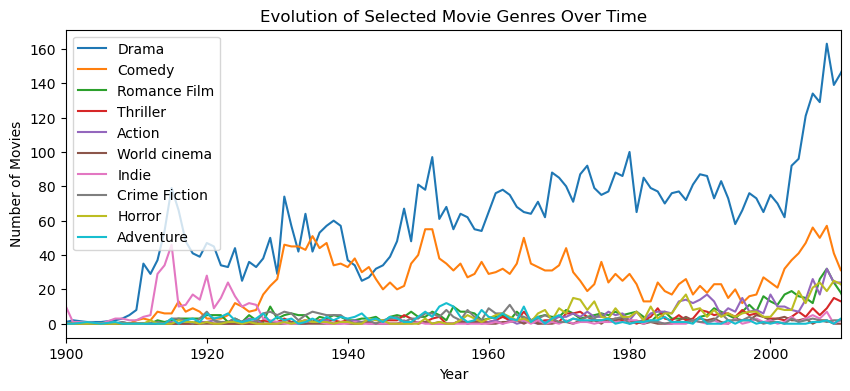

In [122]:
#evolution over time of each genre
plt.figure(figsize=(10, 4))
for genre in selected_genres:
    plt.plot(genre_year_counts.index, genre_year_counts[genre], label=genre)
plt.xlim(1900, 2010)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Evolution of Selected Movie Genres Over Time')
plt.legend()
plt.show()

The graph reveals significant variations in the popularity of movie genres over time. We will later examine whether these fluctuations correlate with historical events or crises.

### ➔ Movies per countries

In our analysis, we aim to examine the impact of historical events on the film industry across different countries. To begin, let’s look at the number of movies produced by each country in our dataset.

Since movies can be associated with more than one country, we will split the dataset so that each country listed for a movie is counted individually. This way, a movie will be included once for each country it’s attributed to.

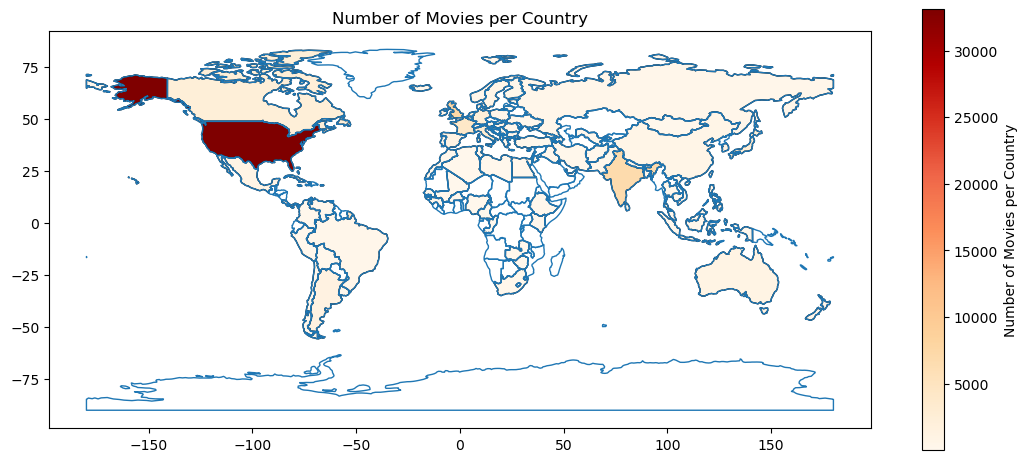

In [123]:
movies_per_country_counts = preprocessed_movies.assign(Countries=preprocessed_movies['Countries'].str.split(', ')).explode('Countries')
movies_per_country_counts = movies_per_country_counts['Countries'].value_counts().reset_index()
movies_per_country_counts.columns = ['Countries', 'Movie_Count']
plot_movies_map(preprocessed_movies, movies_per_country_counts)

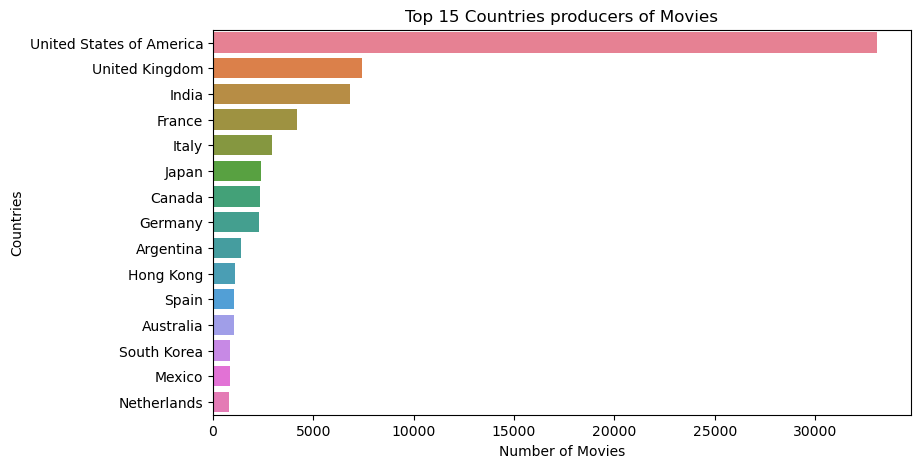

,Countries,Movie_Count
0,United States of America,33104
1,United Kingdom,7424


In [124]:
top15_contry_movie_production = movies_per_country_counts.iloc[:15]

plt.figure(figsize=(9, 5))
sns.barplot(x='Movie_Count', y='Countries', data=top15_contry_movie_production, hue='Countries', legend=False)
plt.ylabel('Countries')
plt.xlabel('Number of Movies')
plt.title('Top 15 Countries producers of Movies')
plt.show()

top15_contry_movie_production.head(2)

The United States has clearly dominated the film industry, with a total of 33,104 movies released—four times more than the United Kingdom, the second-largest film producer. Let’s explore whether this dominance has remained consistent over time or if it is a more recent trend.

,Top 1 country producer,Top 2 country producer,Top 3 country producer
Decade,,,
1850,France,United States of America,United Kingdom
1900,United States of America,United Kingdom,Germany
1950,United States of America,India,United Kingdom
2000,United States of America,India,United Kingdom


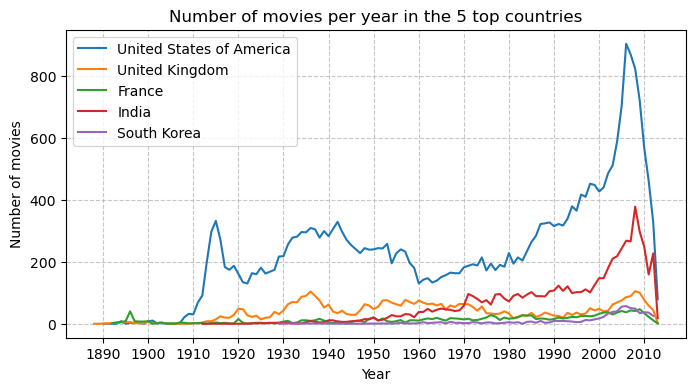

In [125]:
double_decades = (preprocessed_movies['Year'] // 50) * 50

best_country_per_decade = preprocessed_movies.assign(Countries=preprocessed_movies['Countries'].str.split(', ')).explode('Countries')

movies_per_decade_country = best_country_per_decade.groupby([double_decades, 'Countries']).size().unstack(fill_value=0)
top_3_countries_per_decade = movies_per_decade_country.apply(lambda x: x.nlargest(3).index.tolist(), axis=1)

#display the top 10 countries per decade
top_3_countries_df = pd.DataFrame(top_3_countries_per_decade.tolist(), index=top_3_countries_per_decade.index)
top_3_countries_df.index.name = 'Decade'
top_3_countries_df.columns = [f'Top {i+1} country producer' for i in range(top_3_countries_df.shape[1])]

display(top_3_countries_df)


countries = ['United States of America', 'United Kingdom', 'France', 'India', 'South Korea']
country_movies = {country: preprocessed_movies[preprocessed_movies['Countries'] == country] for country in countries}

plt.figure(figsize=(8, 4))
for country, movies in country_movies.items():
    plt.plot(movies['Year'].value_counts().sort_index(), label=country)

plt.title('Number of movies per year in the 5 top countries')
plt.xlabel('Year')
plt.xticks(range(int(preprocessed_movies['Year'].min()) + 2, int(preprocessed_movies['Year'].max()), 10))
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Number of movies')
plt.legend()
plt.show()


We can see that the United States has always had a strong historical dominance in the film industry since 1910. Hollywood has been a leading industry for many years and our data supports this. 

We do however see a rise in India for movie releases which could be due to growing importance of Bollywood and perhaps even suggesting a gradual exportation of indian movies abroad. This is something we can try to assess in our future analysis.  

### ➔ Preliminary Study - War Movies

In this section, we’ll conduct a brief analysis of movies classified as "War Movies." This is a straightforward, focused genre analysis over time, where we’ll examine trends in war movie production, particularly to see if there was an increase in production around major wartime periods, such as the World Wars.

In [126]:
War_movies = preprocessed_movies[preprocessed_movies['Genres'].str.contains(r'war', case=False, na=False)]
War_movies_comedy = War_movies[War_movies['Genres'].str.contains(r'comedy', case=False, na=False)]
War_movies_drama = War_movies[War_movies['Genres'].str.contains(r'drama', case=False, na=False)]

print(f"Total number of War movies: {len(War_movies)}")
print(f"Total number of War-Comedy movies: {len(War_movies_comedy)}")
print(f"Total number of War-Drama movies: {len(War_movies_drama)}")

Total number of War movies: 2467
Total number of War-Comedy movies: 225
Total number of War-Drama movies: 1656


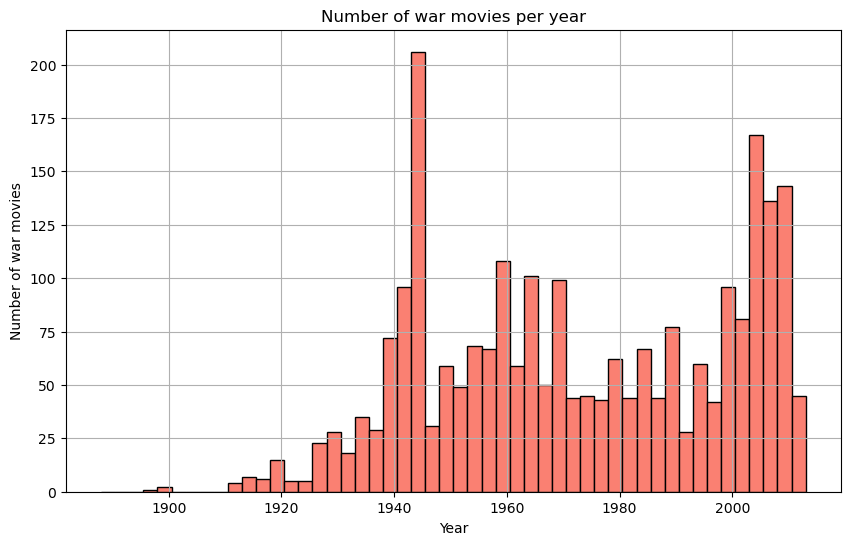

In [230]:
plt.figure(figsize=(10,6))
War_movies["Year"].hist(bins=50, range=(preprocessed_movies["Year"].min(), preprocessed_movies["Year"].max()), color = 'salmon', edgecolor = 'black')

plt.xlabel("Year")
plt.ylabel("Number of war movies")
plt.title("Number of war movies per year")
plt.show()

The plot shows the number of war movies produced each year. There is a significant increase in war movie production during the 1940s, which aligns with World War II, suggesting that the conflict likely influenced the film industry. Another peak appears around the early 2000s.

We know that the distribution of the movies is skewed to the right, so let's focus on the proportion rather than the number of movies.

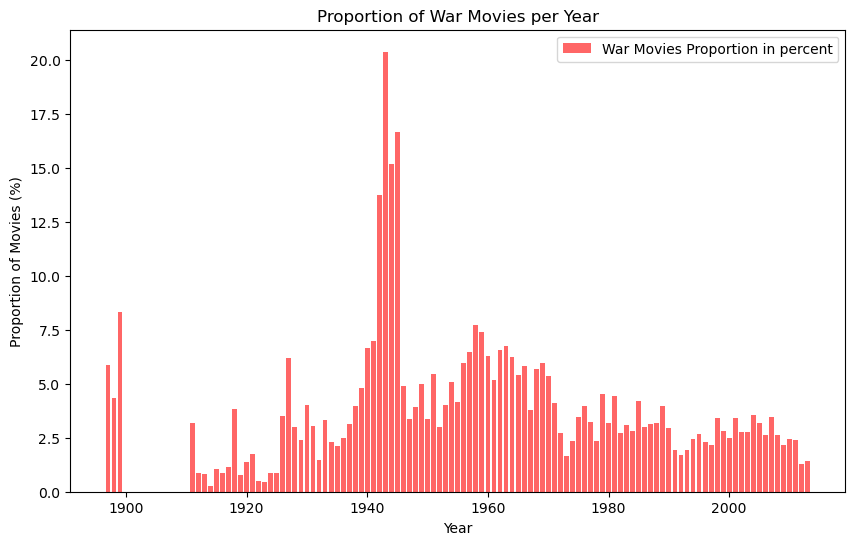

In [128]:
total_movies_per_year = preprocessed_movies.groupby('Year').size()
war_movies_per_year = War_movies.groupby('Year').size()

#proportion of each category of movie per year
war_movies_proportion = (war_movies_per_year / total_movies_per_year)*100

plt.figure(figsize=(10, 6))
plt.bar(war_movies_proportion.index, war_movies_proportion.values, label='War Movies Proportion in percent', color='red', alpha=0.6)
plt.xlabel('Year')
plt.ylabel('Proportion of Movies (%)')
plt.title('Proportion of War Movies per Year')
plt.legend(loc='upper right')
plt.show()

Another interesting question to explore is whether these war movies tend to lean more toward comedic or dramatic themes.

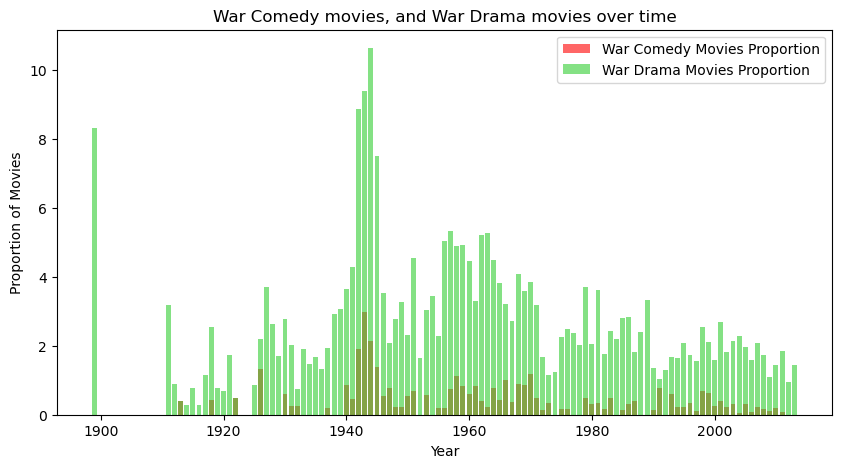

In [129]:
war_comedy_movies_per_year = War_movies_comedy.groupby('Year').size()
war_drama_movies_per_year = War_movies_drama.groupby('Year').size()

#calculate the proportion of each category of movie per year
war_comedy_movies_proportion = (war_comedy_movies_per_year / total_movies_per_year)*100
war_drama_movies_proportion = (war_drama_movies_per_year / total_movies_per_year)*100

plt.figure(figsize=(10, 5))
plt.bar(war_comedy_movies_proportion.index, war_comedy_movies_proportion.values, label='War Comedy Movies Proportion', color='red', alpha=0.6)
plt.bar(war_drama_movies_proportion.index, war_drama_movies_proportion.values, label='War Drama Movies Proportion', color='limegreen', alpha=0.6)

plt.xlabel('Year')
plt.ylabel('Proportion of Movies')
plt.title('War Comedy movies, and War Drama movies over time')
plt.legend(loc='upper right')
plt.show()

The graph clearly shows that the theme of war is much more frequently portrayed from a dramatic rather than a comedic perspective.

Although our data contains a substantial amount of information for analysis, to incorporate historical events as an influencing factor on the distribution of our data and better understand the trends in movie distribution, we need to import an additional dataset containing information about historical world events.

# Additional dataset : "World Important Events - Ancient to Modern"

We begin with the cleaning, preprocessing and investigation of this additional dataset, creating categories useful for analysis, such as "war," "economic crisis," and "period of stability." 

## 1 - Data Collection

We start with an overview of the historical dataset, an open-source collection titled "World Important Events - Ancient to Modern World."  (Author: Saket Kumar)

In [130]:
raw_history_data= pd.read_csv("data/HistoricalDataset/historical.dataset.zip")
initial_length = len(raw_history_data)
print(f"The initial dataframe has {initial_length} lines.")

The initial dataframe has 1096 lines.


In [131]:
raw_history_data.head(3)

,Sl. No,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
0,1,Indus Valley Civilization Flourishes,Unknown,Unknown,2600 BC,India,Civilization,Indus Valley,Development of one of the world's earliest urb...,Local inhabitants,Indus Valley people,Positive
1,2,Battle of the Ten Kings,Unknown,Unknown,1400 BC,India,Battle,Punjab,Rigvedic tribes consolidated their control ove...,Rigvedic tribes,Sudas,Positive
2,6,Establishment of the Delhi Sultanate,Unknown,Unknown,1206,India,Political,Delhi,Muslim rule established in parts of India,People of Delhi and surrounding regions,QutbUnknownudUnknowndin Aibak,Mixed


## 2- Preliminary Data Cleaning

Here are the steps of our data cleaning: 
- We removed the columns "Place Name","Date" and "Month" of the dataset. We don't need such precision in the historical events date because our analysis will focus on their impact on film industry, and films are usually released years after an event. The Place Name is also a precision that we won't need, as we are working at the scale of countries.
- We saw that some of the dates are before Christ (BC). We can safely remove them, knowing that movies didn't exist at that time.
- The historical dataset starts from very ancient times, so we only kept events happening after the first movie was released. We also don't want the historical event that happens after the last movie that we got.
- We also note that there are no missing values.
- Transformed the date formats for temporal analysis to match the format of our movie dataset.
- To show on a world map the number of events happening in each country we will use a geopandas dataset. Some countries of the historical dataset have different names than geopandas, so we will need to formatted them to match.
- Countries where no movies were made (or at least not in our dataset) can be removed from the historical dataset, because they won't be useful for our analysis.

In [132]:
first_movie_year = preprocessed_movies['Year'].min()
last_movie_year = preprocessed_movies['Year'].max()

cleaned_events = preprocess_events(raw_history_data, first_movie_year, last_movie_year)

In [133]:
events_countries = cleaned_events['Country'].unique()
movies_countries = preprocessed_movies['Countries'].str.split(', ').explode().unique()

#Elements in events_countries that are not in movies_countries
not_in_movies_dataset = [item for item in events_countries if item not in movies_countries]
cleaned_events = cleaned_events[cleaned_events['Country'].isin(movies_countries)]

In [134]:
print("The dataframe following preprocessing steps has", len(cleaned_events), "entries.")
print(initial_length - len(cleaned_events), "rows were lost following the cleaning steps.")

The dataframe following preprocessing steps has 574 entries.
522 rows were lost following the cleaning steps.


A lot of rows were lost, but that's fine because we don't need a very large dataset for the historical events. Instead we want to choose relevant ones to analyse their impact on film industry.

### Duplicates

In [135]:
#Check for completely identical rows 
exact_duplicates = cleaned_events[cleaned_events.duplicated(keep=False)]
print(f"\nNumber of completely identical rows: {len(exact_duplicates)}")

#duplicates in the Movie name column
duplicates = cleaned_events[cleaned_events.duplicated(subset=['Name of Incident'], keep=False)]

#number of events that appear more than once
num_unique_duplicates = len(duplicates['Name of Incident'].unique())
print(f"\nNumber of unique events that are duplicated: {num_unique_duplicates}")

print("\Duplicated events:")
duplicates.sort_values('Name of Incident').head(5)


Number of completely identical rows: 0

Number of unique events that are duplicated: 20
\Duplicated events:


,Name of Incident,Year,Country,Type of Event,Impact,Affected Population,Important Person/Group Responsible,Outcome
944,August Revolution,1983,Burkina Faso,Revolution,"Thomas Sankara came to power, initiating radic...",Burkinabè,Thomas Sankara,Positive
439,August Revolution,1945,Vietnam,Independence Movement,Led to the declaration of Vietnam's independen...,Vietnamese people,"Hồ Chí Minh, Việt Minh",Positive
212,Battle of Stalingrad,1942,Russia,Military Battle,"A turning point in WWII on the Eastern Front, ...",Soviet and German military,"Soviet Union, Nazi Germany",Positive
1053,Battle of Stalingrad,1942,Germany,Military,Turning point in WWII first major defeat of Na...,German population,Soviet Union,Negative
442,Battle of Điện Biên Phủ,1954,Vietnam,Military Siege,A decisive battle that ended French colonial r...,"Vietnamese, French soldiers","Võ Nguyên Giáp, French Army",Positive


There are 20 events that appear multiple times in the dataset. This is because some events affected multiple countries or had different aspects recorded separately. For example, the August Revolution appears for both Vietnam and Burkina Faso in different years. The Battle of Stalingrad is recorded for both Russia and Germany and has different outcomes depending on the country.
Since they represent different perspectives or aspects of the same events, we will keep these duplicates as they provide valuable context about how events impacted different countries and populations.


### Save the complementary dataset

In [136]:
#save the cleaned data to a csv file
processed_data_path = 'data/Preprocessed_data/preprocessed_history.csv'
cleaned_events.to_csv(processed_data_path, encoding='utf-8', errors='ignore', index=False)
preprocessed_history = cleaned_events.copy()

## 3 - Univariate analysis

Once more, we may assess one by one the different variables from our data independently to understand characteristics, look for outliers and trends in their distribution.
Let's visualize the  distribution of the number of events that happened each year in the historical dataset.

### ➔ Event Year

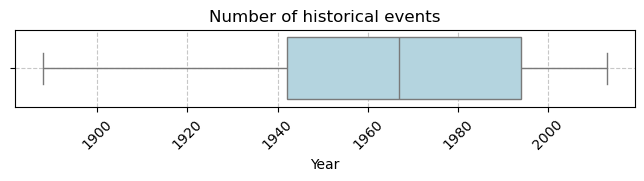

In [137]:
plot_boxplot(preprocessed_history['Year'], 'Number of historical events', 'Year', figsize=(8, 1), color='lightblue', orient='h')

In [138]:
top5 = preprocessed_history["Country"].value_counts().iloc[:5]
top5_countries = preprocessed_history[preprocessed_history["Country"].isin(top5.index[:5])]

C:\Users\lauri\AppData\Local\Temp\ipykernel_44980\2987865147.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



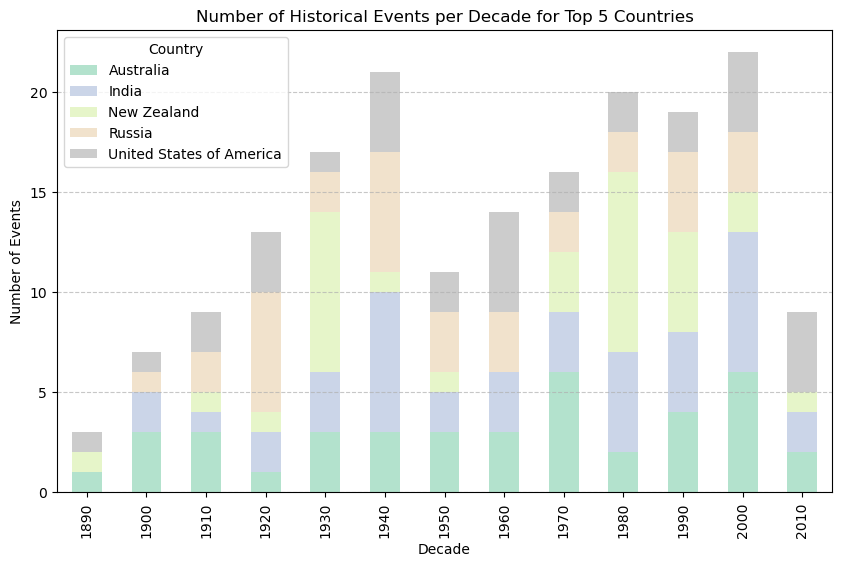

In [139]:
top5_countries.loc[:, 'Decade'] = (top5_countries['Year'] // 10) * 10
decade_counts = top5_countries.groupby(['Decade', 'Country']).size().unstack(fill_value=0)

decade_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Pastel2')
plt.xlabel('Decade')
plt.ylabel('Number of Events')
plt.title('Number of Historical Events per Decade for Top 5 Countries')
plt.legend(title='Country')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This stacked bar chart represents the number of historical events by decade for the top five countries in the dataset. This format allows for a clearer comparison of each country's historical events over time, as well as an easy view of dominant countries in each decade. 

We already have a significant amount of data on events in India, which has led us to later initiate a case study to begin analyzing our research question about the country.

### ➔ Event Type

In [140]:
#Number of event types in the dataset
t_events = preprocessed_history['Type of Event'].str.split(', ').explode().unique()
print(f"Total number of event types: {len(t_events)}")

Total number of event types: 240


There are 240 different event types in the historical data. Just as we did for the genres in the movies, we can attempt to select a more relevant subset of these types. For this preliminary analysis, we can select a subset of these events (Wars for example? - maybe regroup war dates, see if there is a period with many wars which correlates with movies about war?)

We can quickly observe that many of our event types only occur once.

In [141]:
e_types_counts = preprocessed_history['Type of Event'].str.split(', ').explode().value_counts()
t_events = e_types_counts[e_types_counts <= 10]
rare_t_events = len(t_events)

print(f"Number of event types assigned to 10 dates or less  : {rare_t_events}")

Number of event types assigned to 10 dates or less  : 232


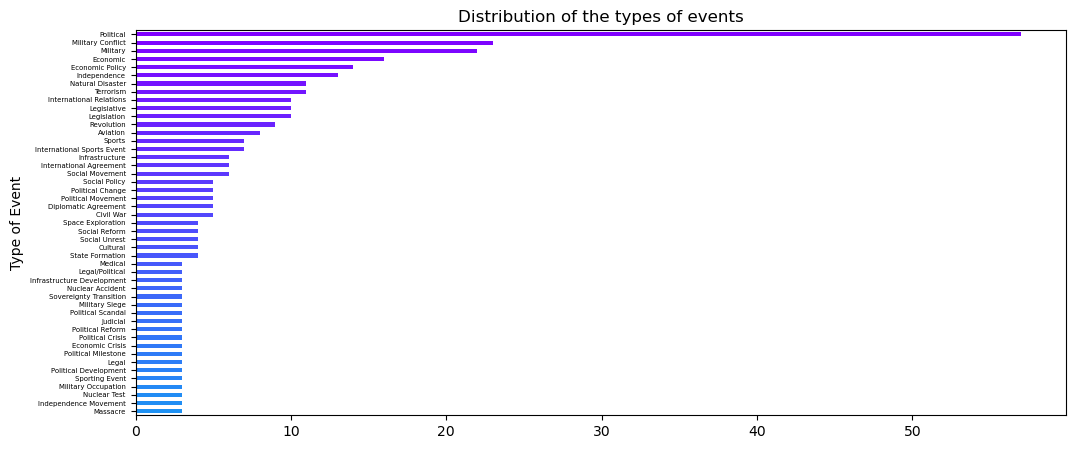

In [142]:
#Event type distribution
t_events = e_types_counts[e_types_counts > 2]

#bar colors
num_bars = len(e_types_counts)
colors = plt.cm.rainbow(np.linspace(0, 1, num_bars))

#plot with rainbow colors assigned to each bar
plt.figure(figsize=(12, 5))
t_events.plot(kind='barh', color=colors)
plt.title('Distribution of the types of events')
plt.yticks(fontsize=5) 
plt.gca().invert_yaxis() 

One way to select a subset of dates: by their number of assigned dates. This is however debatably relevant because some types of events could be rare but give a much better descriptive indication of the nature of the event. For example, the top represented types of events are "Political" and "Independence" which are guite vague in nature. Moreover, we see that "Military" and "Military Conflict" have a close number of occurences. This could mean that they have a strong association: we could therefore try to aggregate the event types that are always associated together. 

Lets analyse the correlation between types of events:

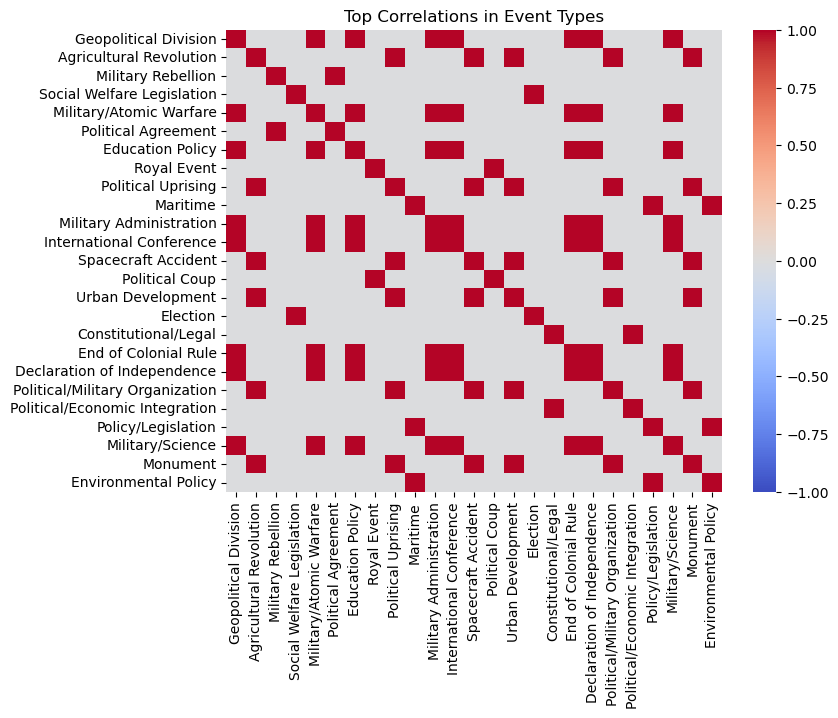

In [ ]:
event_type_binary = pd.get_dummies(preprocessed_history['Type of Event'])
df_encoded = pd.concat([preprocessed_history[['Year']], event_type_binary], axis=1)
event_counts_by_year = df_encoded.groupby('Year').sum()
correlation_matrix = event_counts_by_year.corr()
corr_values = correlation_matrix.unstack().reset_index()
corr_values.columns = ['Event Type 1', 'Event Type 2', 'Correlation']
corr_values = corr_values[corr_values['Event Type 1'] != corr_values['Event Type 2']]
corr_values = corr_values.reindex(corr_values['Correlation'].abs().sort_values(ascending=False).index)

top_n = 20 # top N highest correlations
top_corrs = corr_values.head(top_n)
top_event_types = list(set(top_corrs['Event Type 1']).union(set(top_corrs['Event Type 2'])))
subset_matrix = correlation_matrix.loc[top_event_types, top_event_types]

plt.figure(figsize=(8, 6))
sns.heatmap(subset_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Top Correlations in Event Types')
plt.show()

In [145]:
corr_values

,Event Type 1,Event Type 2,Correlation
1158,Agricultural Revolution,Political/Military Organization,1.000000
15661,End of Colonial Rule,Education Policy,1.000000
30311,Maritime,Environmental Policy,1.000000
46826,Political/Economic Integration,Constitutional/Legal,1.000000
36800,Military/Science,Geopolitical Division,1.000000
...,...,...,...
41549,Political,Coup,0.003846
12379,Economic,Military Conflict,-0.002408
33411,Military Conflict,Economic,-0.002408
50249,Revolution,Independence,0.001602


For the time being, in order to study a manageble subset of the data, we can concentrate on an arbitrary type of event?

### ➔ Event Country

We look at the geographical distribution of events of the 10 first countries.

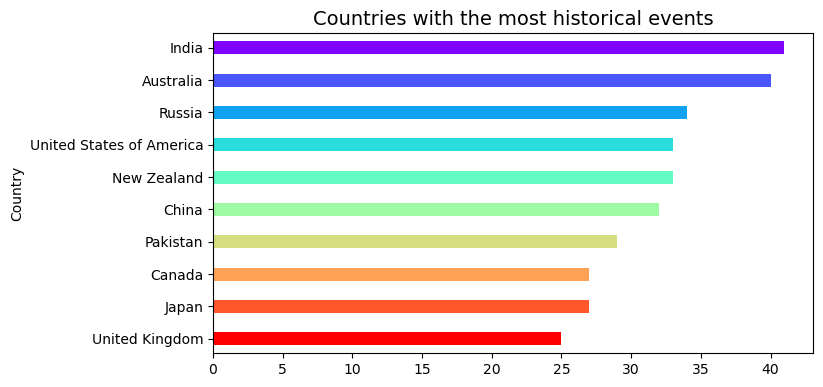

In [146]:
#Country event distribution
country_counts = preprocessed_history['Country'].value_counts().head(10)
num_bars = len(country_counts)
colors = plt.cm.rainbow(np.linspace(0, 1, num_bars))

plt.figure(figsize=(10, 4))  
country_counts.plot(kind='barh', color=colors, width=0.4)  
plt.title('Countries with the most historical events', fontsize=14)
plt.yticks(fontsize=10) 
plt.xticks(fontsize=10)
plt.gca().invert_yaxis()
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1)
plt.show()

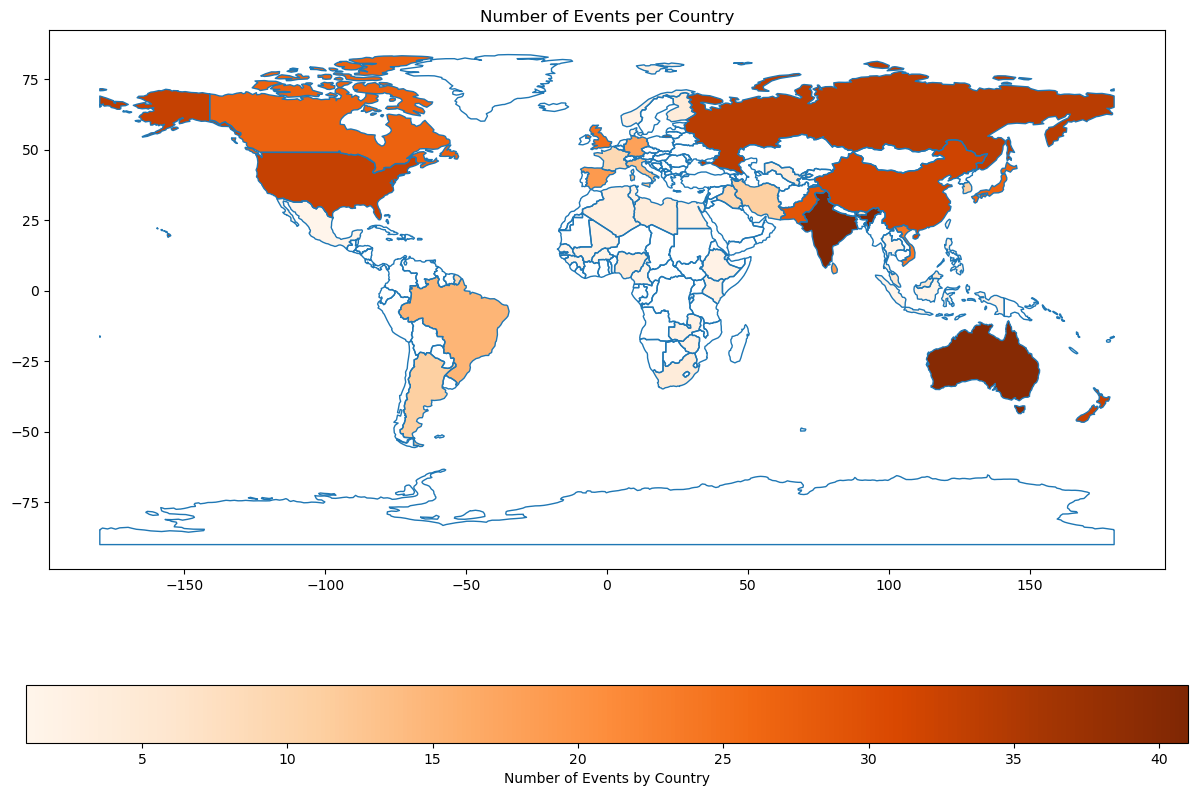

In [147]:
plot_events_map(preprocessed_history)

## 4 - Bivariate Analysis

 ### Case Study: India

Here we aim to look at correlations and influences between the variables of the data, concentrating on the events that happen in one country: India.
This can give us an idea of trends in our variables and could be useful when combined with our movie data to begin assessing the questions posed by our analysis.

In [148]:
India_events = preprocessed_history[preprocessed_history['Country']=='India']
India_movies = preprocessed_movies[preprocessed_movies['Countries']=='India']

## Distribution of movies and historical events in india from 1900 to 2013

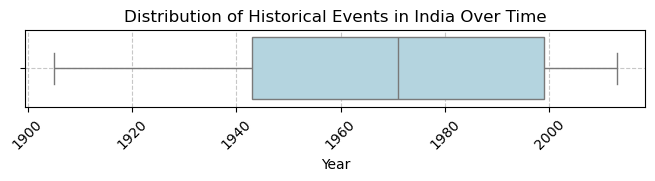

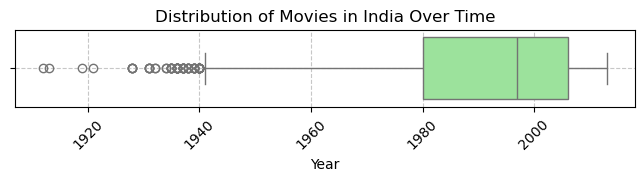

In [149]:
plot_boxplot(India_events['Year'], 'Distribution of Historical Events in India Over Time', 'Year', figsize=(8, 1), color='lightblue', orient='h')
plot_boxplot(India_movies['Year'], 'Distribution of Movies in India Over Time', 'Year', figsize=(8, 1), color='lightgreen', orient='h')

### Map of the historical event

Here is the timeline of the events that occurs in india between 1900 and 2013. 
You can navigate through the timeline using the display bar on the right corner. 
If you scrowl on the point you can have more information on the event.
The color of the dot indicate if the outcome was classified positive (green) or negative (red).

In [150]:
events = India_events.sort_values(by='Year').reset_index(drop=True)

#y_positions = [i for i in range(len(events))]   #don't know which position is the best, better looking
y_positions = np.random.uniform(len(events)*0.1, len(events)*0.8, len(events))

color_map = {'Positive': 'green', 'Negative': 'red'}
colors = events['Outcome'].map(color_map)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=events['Year'],
    y=y_positions,
    mode="markers+text",
    marker=dict(size=10, color=colors),
    text=events['Name of Incident'],
    textposition="top center",
    showlegend=False,  
    hovertext=events.apply(lambda row: f"Event: {row['Name of Incident']}<br>Type of event: {row['Type of Event']}<br>Affected Population: {row['Affected Population']}", axis=1),
    hoverinfo="text"
))

fig.update_layout(
    title="Timeline of Historical Events in India since 1900",
    xaxis=dict(range=[1880, 2025], title="Year"),  # We take range value out of the range of event for clarity of the plot
    yaxis=dict(range=[0, len(events) ], visible=False),    #just for positionning, doesn't make sense to show it
    width=1200,  
    height=500
)

fig.show(config={'displayModeBar': True})

If the project is visualized online, this Plotly plot will not appear because it is an interactive plot. Thus, here is a picture of the timeline of historical events in India since 1900.

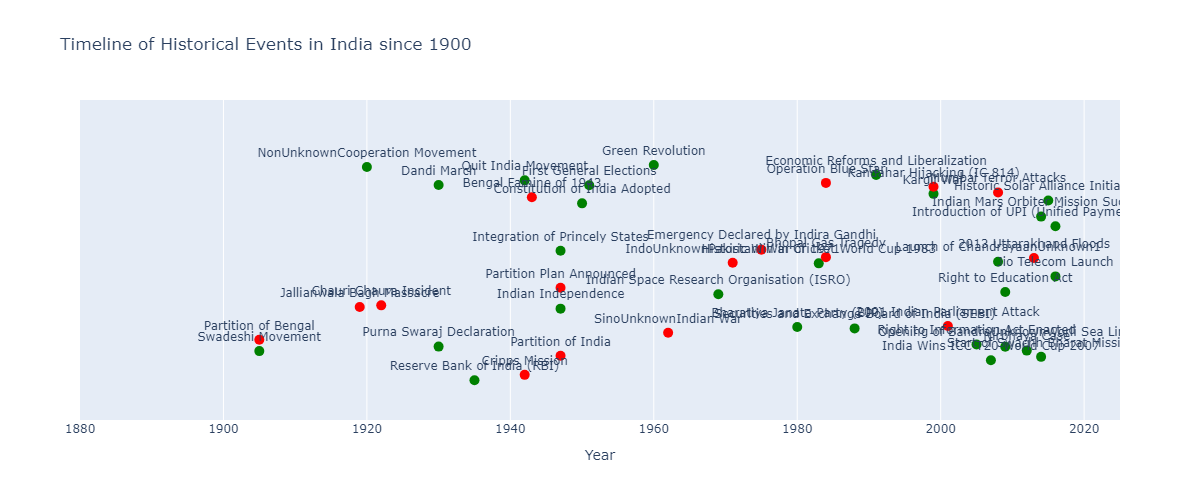

In [151]:
Image(filename='src/india_plot_1.png')

There are many events to consider, so we'll focus on selecting the most significant ones. However, since the criteria for importance aren't defined, let's take a moment to think it through.

Considering the "Affected Population" as a criterion sounds reasonable. 
Let's focus on selecting events that impact the entire Indian population. 
This approach can help us narrow down the most significant events affecting the whole nation.

In [152]:
list_affected = India_events["Affected Population"].tolist()
list_affected [:6]

['Hindus, Muslims, Sikhs',
 'Bengalis in East Pakistan',
 'International community',
 'Citizens of Mumbai',
 'Indian nationalists',
 'Indian farmers']

We have multiple labels describing the same population. For example, terms like "Indian citizens," "Indian civilians,"People of India " "Indian population ", "All citizens of India" all refer to the same group.

In [153]:
indian_commu_affected = India_events[India_events["Affected Population"].str.contains("Indian citizens|Indian civilianPeople of India|Indian population|All citizens of Indias", case=False, na=False)]

print(len(indian_commu_affected),"differents labels can represent the Indian Population.")

5 differents labels can represent the Indian Population.


In [154]:
events = indian_commu_affected.sort_values(by='Year').reset_index(drop=True)

y_positions = [i for i in range(len(events))]   #don't know which position is the best, better looking
#y_positions = np.random.uniform(len(events)*0.1, len(events)*0.8, len(events))

color_map = {'Positive': 'green', 'Negative': 'red'}
colors = events['Outcome'].map(color_map)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=events['Year'],
    y=y_positions,
    mode="markers+text",
    marker=dict(size=10, color=colors),
    text=events['Name of Incident'],
    textposition="top center",
    showlegend=False,  
    hovertext=events.apply(lambda row: f"Event: {row['Name of Incident']}<br>Type of event: {row['Type of Event']}<br>Affected Population: {row['Affected Population']}", axis=1),
    hoverinfo="text"
))

fig.update_layout(
    title="Most significant events in India since 1900",
    xaxis=dict(range=[1880, 2025], title="Year"),  # We take range value out of the range of event for clarity of the plot
    yaxis=dict(range=[0, len(events) ], visible=False),    #just for positionning, doesn't make sense to show it
    width=1200,  
    height=500
)
fig.show(config={'displayModeBar': True})

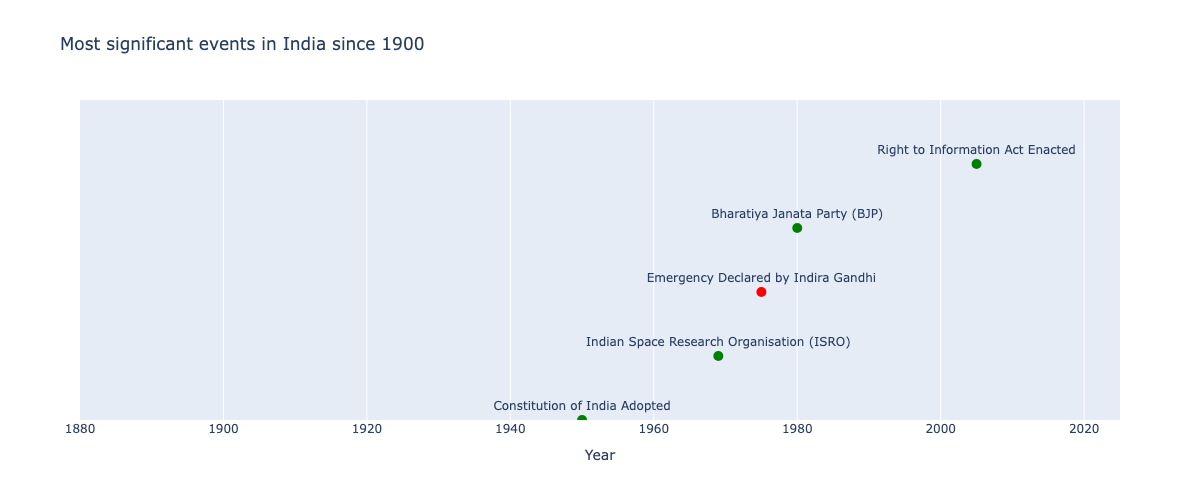

In [155]:
Image(filename='src/india_plot_2.png')

# Linking the two datasets : Movies and Events !

We are going to analyze the impact of some major periods of the 20th century on the film industry. 

In [ ]:
war_events = preprocessed_history[preprocessed_history['Type of Event'].str.contains(r'war', case=False, na=False)]
political_events = preprocessed_history[preprocessed_history['Type of Event'].str.contains(r'political|politic', case=False, na=False)]
economical_events = preprocessed_history[preprocessed_history['Type of Event'].str.contains(r'economic|economical', case=False, na=False)]
social_events = preprocessed_history[preprocessed_history['Type of Event'].str.contains(r'social', case=False, na=False)]

print(len(war_events))
print(len(political_events))
print(len(economical_events))
print(len(social_events))

10
119
44
27


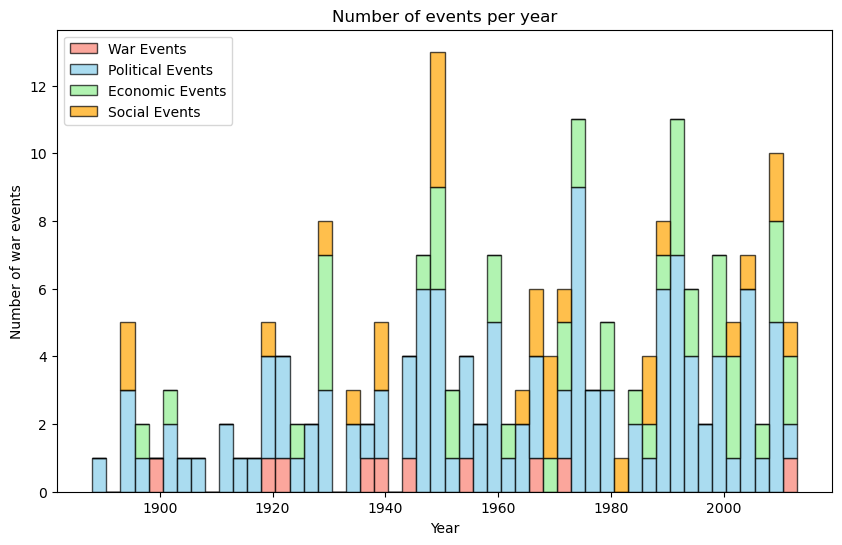

In [157]:
plt.figure(figsize=(10,6))
plt.hist([war_events["Year"], political_events["Year"], economical_events["Year"], social_events["Year"]],
         bins=50,
         range=(preprocessed_history["Year"].min(), preprocessed_history["Year"].max()),
         color=['salmon', 'skyblue', 'lightgreen', 'orange'], 
         edgecolor='black', 
         alpha=0.7, 
         label=["War Events", "Political Events", "Economic Events", "Social Events"],
         stacked=True)
plt.xlabel("Year")
plt.ylabel("Number of war events")
plt.title("Number of events per year")
plt.legend()
plt.show()

In [158]:
print(economical_events[economical_events["Year"]==1929])

                        Name of Incident  Year                   Country  \
208      Collectivization of Agriculture  1929                    Russia   
289  The Great Depression Hits Australia  1929                 Australia   
621           Stock Market Crash of 1929  1929  United States of America   

       Type of Event                                             Impact  \
208  Economic Policy  Forced consolidation of individual peasant hou...   
289  Economic Crisis  Severely affected Australia's economy, leading...   
621         Economic  Led to the Great Depression, impacting global ...   

       Affected Population Important Person/Group Responsible   Outcome  
208               Peasants                      Joseph Stalin  Negative  
289  Australian population                            Unknown  Negative  
621      Global population                            Unknown  Negative  


In [ ]:
comedy_movies = preprocessed_movies[preprocessed_movies['Genres'].str.contains(r'comedy', case=False, na=False)]
drama_movies = preprocessed_movies[preprocessed_movies['Genres'].str.contains(r'drama', case=False, na=False)]
romance_movies = preprocessed_movies[preprocessed_movies['Genres'].str.contains(r'romance|romantic', case=False, na=False)]
thriller_movies = preprocessed_movies[preprocessed_movies['Genres'].str.contains(r'thriller', case=False, na=False)]

# Print the result to check
print(len(War_movies))
print(len(comedy_movies))
print(len(drama_movies))
print(len(romance_movies))
print(len(thriller_movies))

2467
19289
31646
10161
8603


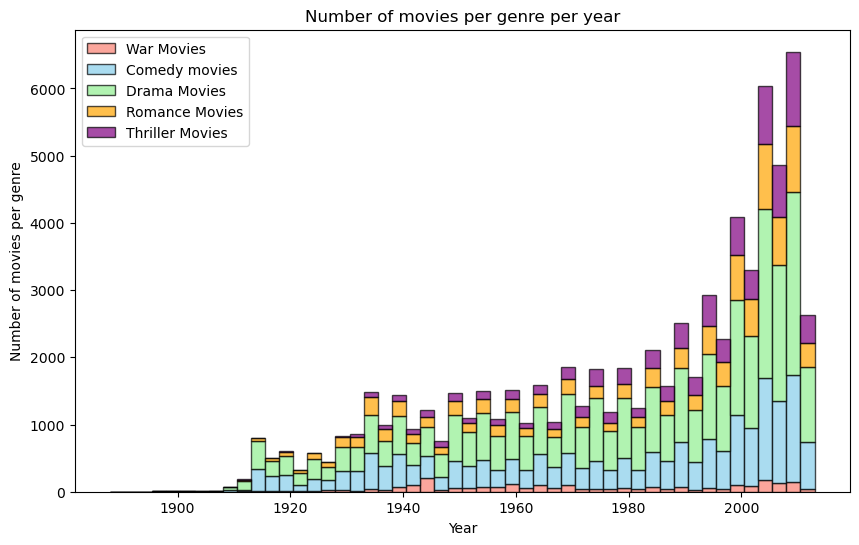

In [233]:
plt.figure(figsize=(10,6))
plt.hist([War_movies["Year"], comedy_movies["Year"], drama_movies["Year"], romance_movies["Year"], thriller_movies["Year"]],
         bins=50,
         range=(preprocessed_history["Year"].min(), preprocessed_history["Year"].max()),
         color=['salmon', 'skyblue', 'lightgreen', 'orange', 'purple'], 
         edgecolor='black', 
         alpha=0.7, 
         label=["War Movies", "Comedy movies", "Drama Movies", "Romance Movies", "Thriller Movies"],
         stacked=True)
plt.xlabel("Year")
plt.ylabel("Number of movies per genre")
plt.title("Number of movies per genre per year")
plt.legend()
plt.show()

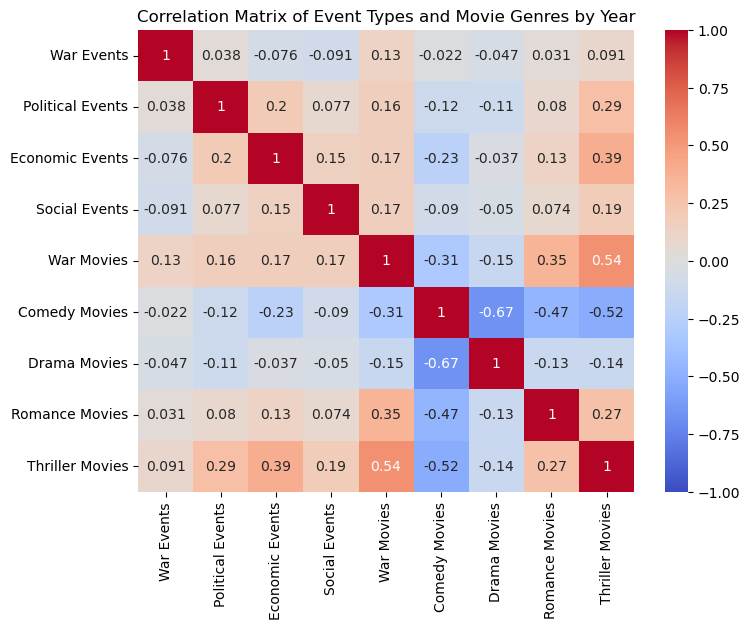

In [222]:
# Function to group by year, count, shift, and reindex
def process_event_data(events, shift, years_range):
    return events.groupby('Year').size().shift(shift).reindex(years_range, fill_value=0)

def process_movie_data(movies, years_range):
    return movies.groupby('Year').size().reindex(years_range, fill_value=0)

# Define the range of years
years_range = range(preprocessed_movies['Year'].min(), preprocessed_movies['Year'].max() + 1)

# Process event data
shift = 3
war_events_per_year = process_event_data(war_events, shift, years_range)
political_events_per_year = process_event_data(political_events, shift, years_range)
economical_events_per_year = process_event_data(economical_events, shift, years_range)
social_events_per_year = process_event_data(social_events, shift, years_range)

# Process movie genre data
war_movies_per_year = process_movie_data(War_movies, years_range)
comedy_movies_per_year = process_movie_data(comedy_movies, years_range)
drama_movies_per_year = process_movie_data(drama_movies, years_range)
romance_movies_per_year = process_movie_data(romance_movies, years_range)
thriller_movies_per_year = process_movie_data(thriller_movies, years_range)

# Combine data into a single DataFrame
merged_data = pd.DataFrame({
    'War Events': war_events_per_year,
    'Political Events': political_events_per_year,
    'Economic Events': economical_events_per_year,
    'Social Events': social_events_per_year,
    'War Movies': war_movies_per_year,
    'Comedy Movies': comedy_movies_per_year,
    'Drama Movies': drama_movies_per_year,
    'Romance Movies': romance_movies_per_year,
    'Thriller Movies': thriller_movies_per_year
})

# Normalize movie genre counts by the total movies per year
total_movies_per_year = merged_data[['Comedy Movies', 'Drama Movies', 'Romance Movies', 'Thriller Movies']].sum(axis=1)
merged_data[['Comedy Movies', 'Drama Movies', 'Romance Movies', 'Thriller Movies']] = \
    merged_data[['Comedy Movies', 'Drama Movies', 'Romance Movies', 'Thriller Movies']].div(total_movies_per_year, axis=0)

# Calculate and plot correlation matrix
correlation_matrix = merged_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Event Types and Movie Genres by Year')
plt.show()

The Great Depression was a severe global economic downturn from 1929 to 1939. The period was characterized by high rates of unemployment and poverty; drastic reductions in liquidity, industrial production, and trade; and widespread bank and business failures around the world. The economic contagion began in 1929 in the United States, the largest economy in the world, with the devastating Wall Street stock market crash of October 1929 often considered the beginning of the Depression. One idea is to compare with Post-World War II Economic Boom (1945–1970s): A period of global economic growth and industrialization.

## 5 -  Conclusion and Future Perspectives

To continue this project and further push our analysis, we need to find a way to group certain genres and event types together. Additionally, we will explore how to quantify the significance of each event more thoroughly to retain only the most relevant ones. This approach will simplify our analysis, allowing us to identify potential connections between genres and events. We may also investigate whether a film relates to a particular historical event by examining its plot.

It could also be interesting to pose some hypotheses on the distribution of our variables and how they influence one another. For example, we could imagine that the rise in wars in a given country could lead to an increase in movie releases with war-related genres. It could therefore be interesting to assess the statistical significance of historical events as factors for trends in movie releases.

One approach could be to analyze correlations between historical event frequencies (e.g., wars, economic crises) and the prevalence of certain movie genres over time. This would involve computing correlation coefficients or using regression models to quantify the strength of these relationships. For instance, we could test whether an increase in war-related events correlates with an increase in war-themed movies, controlling for other variables such as economic conditions and popular culture trends.

Additionally, hypothesis testing can help verify whether observed trends are statistically significant or likely due to random variation. For example, we could set up a hypothesis test to see if the proportion of war-related movies significantly increases following war periods compared to stable periods.

Finally, to enhance interpretability, clustering techniques might help categorize similar trends and patterns within the dataset, allowing us to identify genres that respond similarly to specific types of historical events. This could reveal latent relationships within our data that might be overlooked in simple pairwise analyses.

These methods would give us a more robust understanding of how external events might act as drivers or influencers of movie genre trends, allowing us to make informed conclusions about the cultural impact of historical contexts on film production.